## An Example Analysing NuSTAR Data

In this tutorial, we will go through the steps of analyzing NuSTAR observation of the AGN in center of `SWIFT J2127.4+5654` with `obsid = 60001110002` using `heasoftpy`.

The first thing we need is to import the `heasoftpy` package. 
>The first three lines are needed in case `heasoftpy` is not installed yet. We add the folder containing `heasoftpy` to `sys.path` so we can import it.

In [39]:
import os
import sys
from astropy.io import fits

In [18]:
# check the environment  #
if not 'HEADAS' in os.environ:
    raise RuntimeError('Heasoft is not initalized')
    
if not 'CALDB' in os.environ:
    raise RuntimeError('$CALDB is not defined. ')

try:
    sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
    import heasoftpy as hsp
except ImportError:
    raise RuntimeError('Please ensure heasoftpy is in your PYTHONPATH')

In [44]:
print(hsp.__version__,hsp.__path__[0])

1.1 /opt/heasoft/x86_64-pc-linux-gnu-libc2.27/lib/python/heasoftpy


Next, we want to download the data. If you have the data downloaded, you can move the observation folder to the same place as this notebook.

If we're running on SciServer, we can simply use the data from the ``headata`` volume 

In [30]:
# Define NuSTAR obsid and Data Directory

obsid = '60001110002'
nudatadir = !ls -d /home/idies/workspace/headata/FTP/nustar/data/obs/*/*/{obsid}
nudatadir = nudatadir[0]
print(f'NuSTAR data directory = {nudatadir}')

NuSTAR data directory = /home/idies/workspace/headata/FTP/nustar/data/obs/00/6/60001110002


If we're not on SciServer, then we can download the data from the HEASARC archive using either `wget` (linux) or `curl` (mac) 

```bash
wget -q -nH -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks --cut-dirs=6 https://heasarc.gsfc.nasa.gov/FTP/nustar/data/obs/00/6//60001110002/
```

```bash
curl -s --remote-name https://heasarc.gsfc.nasa.gov/FTP/nustar/data/obs/00/6//60001110002/
```

In [40]:
hdu = fits.open('/home/idies/workspace/headata/FTP/nustar/data/obs/00/6/60001110002/event_cl/nu60001110002A01_cl.evt.gz')
hdu[0].header['OBJECT']

'SwiftJ2127d4p5654'

NuSTAR data directory = /home/idies/workspace/headata/FTP/nustar/data/obs/00/6/60001110002


# Process the data using  ``nupipeline``

Next, we use `nupipeline` to process the data ([see details here](https://heasarc.gsfc.nasa.gov/lheasoft/ftools/caldb/help/nupipeline.html)).

As we show in the [Getting Started](getting-started.ipynb) tutorial, we can either call `hsp.nupipeline` or create an instance of `hsp.HSPTaks`. Here, we use the latter

Note that to run `nupipeline`, only three parameters are needed: `indir`, `outdir` and `steminput`. By default, calling the task will also query for other parameters. We can instruct the task to use default values by setting `noprompt=True`.

Also, because `nupipeline` takes some time to run (several to tens of minutes), we will also request the output to printed on screen as the task runs by using `verbose=True`.

For the purposes of illustrations in this tutorial, we will focus on the `FMPA` instrument.

If we use `outdir='60001110002_p/event_cl'`, the call may look something like:


## Define the output directory

We'll put the output from the NuSTAR processing in ``/home/idies/workspace/Temporary/{username}/scratch/nustar/{obsid}``

**Change the username value** in the cell below, as appropriate

In [45]:
username = 'mfacorcoran'

outdir = f'/home/idies/workspace/Temporary/{username}/scratch/nustar/{obsid}'
print(f'Output directory is {outdir}')

Output directory is /home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002


## Run ``nupipeline``

In [19]:

# inialize the task instance
nupipeline = hsp.HSPTask('nupipeline')

# set some parameters.
#outdir = obsid + '_p/event_cl'
stem   = 'nu' + obsid

# run the nupipeline task
out = nupipeline(indir=nudatadir, outdir=outdir, steminputs=stem, instrument='FPMA', 
                 clobber='yes', noprompt=True, verbose=True)


                 Running NuSTAR pipeline
 Task: nupipeline Version: 0.4.9 Release Date: 2021-03-21
nupipeline_0.4.9: Info: CallQuzcif: Running quzcif NuSTAR FPMA - - TELDEF 2012-11-04 17:21:07 "-" retrieve+ clobber=yes
CallQuzcif: Info: Output 'quzcif' Command: 
CallQuzcif: Info:/home/idies/workspace/headata/FTP/caldb/data/nustar/fpm/bcf/teldef/nuA20100101v002.teldef   0
nupipeline_0.4.9: Info: CallQuzcif: Running quzcif NuSTAR FPM - - ALIGNMENT 2012-11-04 17:21:07 "type.eq.systems" retrieve+ clobber=yes
CallQuzcif: Info: Output 'quzcif' Command: 
CallQuzcif: Info:/home/idies/workspace/headata/FTP/caldb/data/nustar/fpm/bcf/align/nuCalign20120101v001.fits   1
------------------------------------------------------------
               Setting Optical Axis Direction
------------------------------------------------------------
nupipeline_0.4.9: Info: 'pntra' and/or 'pntdec' input parameter set to POINT
nupipeline_0.4.9: Info: getting default S/C direction
nupipeline_0.4.9: Info: Optical A

After running for some time, and if things run smoothly, we will get a message like:

```
=============================================================================================
nupipeline_0.4.9: Exit with no errors - Fri Nov 26 13:53:29 EST 2021

=============================================================================================
=============================================================================================

```

A return code of `0`, indicates that the task run with success!

In [25]:
nudatadir = !ls -d /home/idies/workspace/headata/FTP/nustar/data/obs/*/*/60001110002
nudatadir = nudatadir[0]
print(f'NuSTAR data directory = {nudatadir}')

NuSTAR data directory = /home/idies/workspace/headata/FTP/nustar/data/obs/00/6/60001110002


The main cleaned event files are: `nu60001110002A01_cl.evt` and `nu60001110002B01_cl.evt` for NuSTAR modules `A` and `B`, respectively.


---
Note that the same results can acheived by using the parameters as attributes of the tasks:

```python

nupipeline = hsp.HSPTask('nupipeline')

nupipeline.indir = obsid
nupipeline.outdir = obsid + '_p/event_cl'
nupipeline.steminput = 'nu' + obsid
nupipeline(noprompt=True, verbose=True)

```

---
# Extract a light curve
Now that we have data processed, we can proceed and extract a light curve for the source. For this, we use `nuproducts` (see [nuproducts](https://heasarc.gsfc.nasa.gov/lheasoft/ftools/caldb/help/nuproducts.html) for details)

First, we need to create a source and background region files.

The source regions is a circle centered on the source with a radius of 150 arcseconds, while the background region is an annulus with an inner and outer radii of 180 and 300 arcseconds, respectively.

In [46]:
# write region files to the output directory

region = 'circle(21:27:46.406,+56:56:31.38,150")'
with open(outdir+'/src.reg', 'w') as fp: fp.write(region)

region = 'annulus(21:27:46.406,+56:56:31.38,180",300")'
with open(outdir+'/bgd.reg', 'w') as fp: fp.write(region)


In [48]:

# initialize the task instance
nuproducts = hsp.HSPTask('nuproducts')

params = {
    'indir'         : outdir,
    'outdir'        : f'{outdir}/lc',
    'instrument'    : 'FPMA',
    'steminputs'    : f'nu{obsid}',
    'outdir'        : f'{outdir}/lc',
    'binsize'       : 256,
    'bkgextract'    : 'yes',
    'srcregionfile' : outdir+'/src.reg',
    'bkgregionfile' : outdir+'/bgd.reg',
    'imagefile'     : 'none',
    'phafile'       : 'DEFAULT',
    'bkgphafile'    : 'DEFAULT',
    'runbackscale'  : 'yes',
    'correctlc'     : 'yes',
    'runmkarf'      : 'no',
    'runmkrmf'      : 'no', 
    'clobber'       : 'yes'
}

out = nuproducts(params, noprompt=True, verbose=True)


nuproducts_0.3.3: Info: Running 'nuexpomap' 
nuproducts_0.3.3: Command: nuexpomap vignflag=no vignfile=CALDB pixposfile=CALDB expomapfile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/lc/4711_ex.img skyinstrfile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/lc/4711_skymap.img infile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/nu60001110002A01_cl.evt det2instrfile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/lc/4711_det2map.img skyy=500.5 clobber=yes skyx=500.5 history=yes alignfile=CALDB chatter=3 det1instrfile=NONE aspecthistofile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/lc/4711_asphist.fits instrprobmapfile=CALDB pixbin=5 percent=0.02 det1reffile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/nu60001110002A_det1.fits initseed=no offsetfile=NONE mastaspectfile=/home/idies/workspace/Temporary/mfacorcoran/scratch/nustar/60001110002/

In [49]:
print('return code:', out.returncode)

return code: 0


listing the content of the output directory `60001110002_p/lc`, we see that the task has created a source and background light cruves (`nu60001110002A01_sr.lc` and `nu60001110002A01_bk.lc`) along with the corresponding spectra. 

The task also generates `.flc` file, which contains the background-subtracted light curves.

We can proceed in different ways. We may for example use `fits` libraries in `astropy` to read this fits file directly, or we can use `ftlist` to dump the content of that file to an ascii file before reading it (we use `option=T` to list the table content).

In [53]:
ftlist = hsp.HSPTask('ftlist')
out = ftlist(infile=outdir+'/lc/nu60001110002A01.flc', option='T', 
             outfile=outdir+'/lc/nu60001110002A01.txt', rownum='no', colheader='no', clobber='yes')

0

Again, we could also have used task attributes as input parameters:
```python

ftlist = hsp.HSPTask('ftlist')
ftlist.infile = '60001110002_p/lc/nu60001110002A01.flc'
ftlist.outfile = '60001110002_p/lc/nu60001110002A01.txt'
out = ftlist(option='T')

```

---

- Now, we use `numpy` for example for read the file, and `matplotlib` to plot it.

- For reading the data, we use `numpy.genfromtxt`, which allows for easy handling of missing data (`NULL` values in our case), so these are just replaced by `np.nan`

- The columns are: `Time`, `Time_err`, `Rate`, `Rate_err`, `Fraction_exposure`

- After reading the data, we plot the data points with full exposure (`Fraction_exposure == 1`)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline

In [57]:
#lc_data = np.genfromtxt('60001110002_p/lc/nu60001110002A01.txt', missing_values='NULL', filling_values=np.nan)
lctab = Table.read(outdir+'/lc/nu60001110002A01.flc', hdu=1)

Text(0, 0.5, 'Count Rate (per sec)')

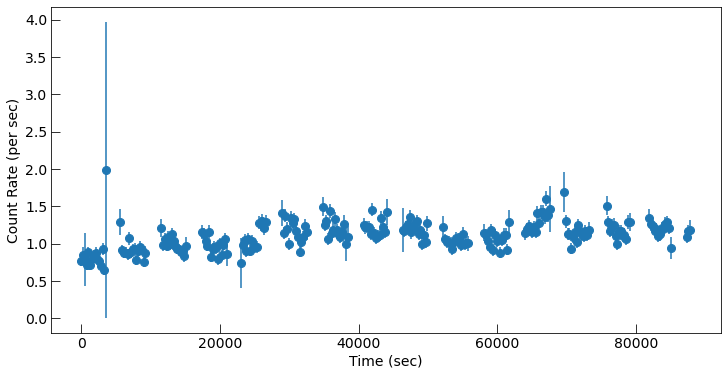

In [61]:
# modify the plot style a little bit
plt.rcParams.update({
    'font.size': 14, 
    'lines.markersize': 8.0,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 9.,
    'ytick.major.size': 9.,
})

fig = plt.figure(figsize=(12,6))
plt.errorbar(lctab['TIME'],lctab['RATE1'],lctab['ERROR1'], fmt='o')
plt.xlabel('Time (sec)')
plt.ylabel('Count Rate (per sec)')